<a href="https://colab.research.google.com/github/scoopcash/jan10-Deep-Neural-Networks/blob/main/Colab_deeplearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning with Keras

This notebook shows how to build a deep learning model to predict the quality score of different wines

In [1]:
# Initial imports
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

%matplotlib inline

In [2]:
# Import student_loans.csv to Google Colab
from google.colab import files
uploaded = files.upload()

Saving student_loans.csv to student_loans.csv


In [3]:
# Read in data
data = "student_loans.csv"
df = pd.read_csv(data)
df.head()

,payment_history,location_parameter,stem_degree_score,gpa_ranking,alumni_success,study_major_code,time_to_completion,finance_workshop_score,cohort_ranking,total_loan_score,financial_aid_score,credit_ranking
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# Create the features (X) and target (y) sets
X = df.iloc[:,0:11].values
y=df['credit_ranking'].values

In [6]:
# Scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X= scaler.transform(X)



## Define a model with 1 hidden layer

In [7]:
# Define the model - shallow neural net
number_hidden_nodes = 8
number_input_features = 11

nn = Sequential()

# Hidden layer
nn.add(
    Dense(units=number_hidden_nodes, input_dim = number_input_features, activation='relu')
)

# Output layer
nn.add(
    Dense(units=1, activation='linear')
)


In [8]:
# Compile the model
nn.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])
# Train the model
model_1 = nn.fit(X,y,validation_split=0.30, epochs =200)

Epoch 1/200
35/35 [==============================] - 1s 9ms/step - loss: 32.5125 - mse: 32.5125 - val_loss: 33.2674 - val_mse: 33.2674
Epoch 2/200
35/35 [==============================] - 0s 4ms/step - loss: 29.4006 - mse: 29.4006 - val_loss: 29.6127 - val_mse: 29.6127
Epoch 3/200
35/35 [==============================] - 0s 3ms/step - loss: 26.6289 - mse: 26.6289 - val_loss: 26.3484 - val_mse: 26.3484
Epoch 4/200
35/35 [==============================] - 0s 3ms/step - loss: 24.1049 - mse: 24.1049 - val_loss: 23.5100 - val_mse: 23.5100
Epoch 5/200
35/35 [==============================] - 0s 3ms/step - loss: 21.8084 - mse: 21.8084 - val_loss: 20.9297 - val_mse: 20.9297
Epoch 6/200
35/35 [==============================] - 0s 3ms/step - loss: 19.7091 - mse: 19.7091 - val_loss: 18.7412 - val_mse: 18.7412
Epoch 7/200
35/35 [==============================] - 0s 3ms/step - loss: 17.8253 - mse: 17.8253 - val_loss: 16.8268 - val_mse: 16.8268
Epoch 8/200
35/35 [==============================] - 0s

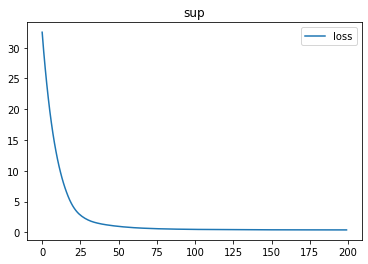

In [10]:
# Plot the train and test loss function
plt.plot(model_1.history['loss'])
plt.legend(['loss'])
plt.title("sup")
plt.show()

## Define a model with 2 hidden layers

In [11]:
# Define the model - deep neural net
number_input_features = 11
number_nodes_layer1 = 8
number_nodes_layer2 = 4

nn=Sequential()
# First hidden layer
nn.add(
    Dense(units=number_nodes_layer1, input_dim = number_input_features, activation = 'relu')
)

# Second hidden layer
nn.add(
    Dense(units=number_nodes_layer2, input_dim = number_input_features, activation = 'relu')
)

# Output layer
nn.add(
    Dense(units=1, activation = 'linear')
)


In [12]:
# Compile model
nn.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])
# Fit the model
model_2 = nn.fit(X,y, validation_split=0.30, epochs=200)

Epoch 1/200
35/35 [==============================] - 1s 6ms/step - loss: 32.1435 - mse: 32.1435 - val_loss: 29.4695 - val_mse: 29.4695
Epoch 2/200
35/35 [==============================] - 0s 4ms/step - loss: 28.4294 - mse: 28.4294 - val_loss: 25.8291 - val_mse: 25.8291
Epoch 3/200
35/35 [==============================] - 0s 3ms/step - loss: 25.1930 - mse: 25.1930 - val_loss: 22.6693 - val_mse: 22.6693
Epoch 4/200
35/35 [==============================] - 0s 3ms/step - loss: 22.2950 - mse: 22.2950 - val_loss: 19.9105 - val_mse: 19.9105
Epoch 5/200
35/35 [==============================] - 0s 3ms/step - loss: 19.5838 - mse: 19.5838 - val_loss: 17.3855 - val_mse: 17.3855
Epoch 6/200
35/35 [==============================] - 0s 2ms/step - loss: 16.9656 - mse: 16.9656 - val_loss: 15.0344 - val_mse: 15.0344
Epoch 7/200
35/35 [==============================] - 0s 3ms/step - loss: 14.4520 - mse: 14.4520 - val_loss: 12.8089 - val_mse: 12.8089
Epoch 8/200
35/35 [==============================] - 0s

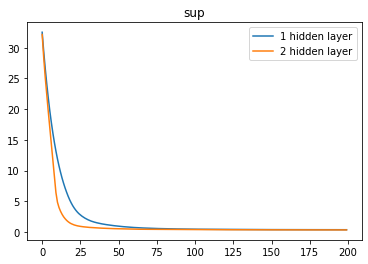

In [13]:
# Overlay results of deep and shallow models
plt.plot(model_1.history['loss'])
plt.plot(model_2.history['loss'])
plt.legend(['1 hidden layer', '2 hidden layer'])
plt.title("sup")
plt.show()

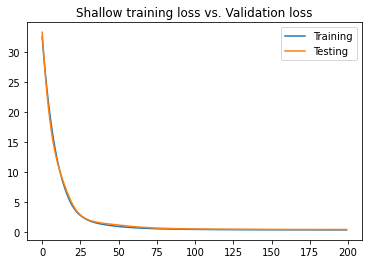

In [17]:
# Train vs test for shallow net
plt.plot(model_1.history['loss'])
plt.plot(model_1.history['val_loss'])
plt.title('Shallow training loss vs. Validation loss')
plt.legend(['Training', 'Testing'])
plt.show()

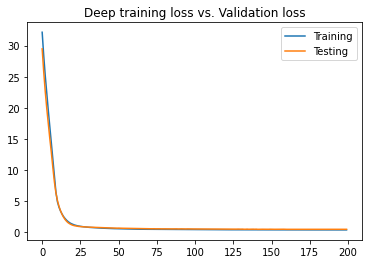

In [18]:
# Train vs test for deep net
plt.plot(model_2.history['loss'])
plt.plot(model_2.history['val_loss'])
plt.title('Deep training loss vs. Validation loss')
plt.legend(['Training', 'Testing'])
plt.show()